In [79]:
import pandas as pd
import seaborn as sb
import statistics as sts

In [80]:
tempo = pd.read_csv('tempo.csv', sep=';')
tempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [68]:
tempo["Aparencia"].value_counts()

sol        5
chuva      5
nublado    3
menos      1
Name: Aparencia, dtype: int64

<Axes: >

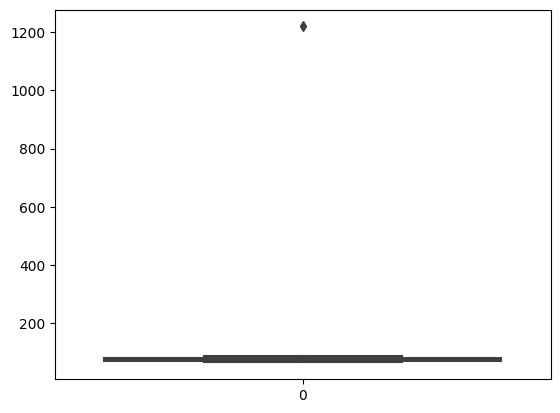

In [69]:
sb.boxplot(tempo['Temperatura'])

In [99]:
#Desvio padrão dessa coluna
desvio_temp = sts.stdev(tempo['Temperatura'])
desvio_temp

306.433758505241

In [103]:
#Fazendo a mediana da coluna tempo
mediana_temp = sts.median(tempo['Temperatura'])
mediana_temp

72.75

In [101]:
#Aplicando a mediana para quem tem mais de dois desvios padrões da mediana
tempo.loc[tempo['Temperatura'] > 2 * desvio_temp, 'Temperatura']

7    1220
Name: Temperatura, dtype: int64

In [102]:
tempo.loc[tempo['Temperatura'] > 2 * desvio_temp, 'Temperatura'] = mediana_temp

<Axes: >

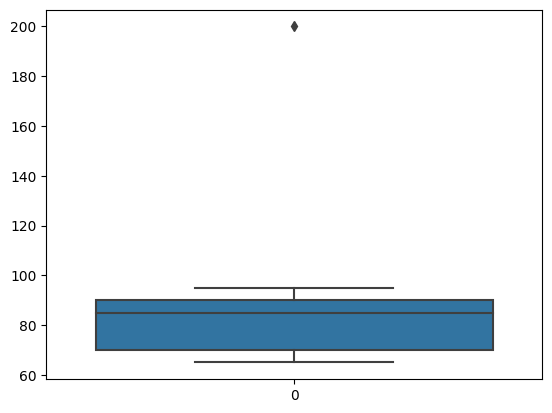

In [73]:
#Executando a limpeza da coluna de dados Umidade
sb.boxplot(tempo['Umidade'])

In [84]:
mediana_umidade = sts.median(tempo['Umidade'])
mediana_umidade

85.5

In [85]:
tempo['Umidade'].fillna(mediana_umidade, inplace=True)

In [86]:
desvio_umidade = sts.stdev(tempo['Umidade'])
desvio_umidade

9.585073102153492

In [83]:
tempo.loc[tempo['Umidade'] > 100, 'Umidade'] = mediana_umidade

In [87]:
tempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,85.5,NaN,sim


In [91]:
tempo['Vento'].value_counts()

FALSO         7
VERDADEIRO    6
Name: Vento, dtype: int64

In [93]:
tempo['Vento'].fillna(tempo['Vento'].mode()[0], inplace=True)

In [94]:
tempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,85.5,FALSO,sim


In [105]:
agrupamento_tempo = tempo.groupby(['Aparencia']).size()
agrupamento_tempo

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [111]:
tempo.loc[tempo['Aparencia'] == 'menos', 'Aparencia'] = tempo['Aparencia'].mode()[0]

In [112]:
tempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
